In [ ]:
#sparse category classification(prediction) in 廣告(kwanggo)

# 데이터 로드 및 전처리

In [ ]:
#google drive 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# 데이터 불러오는 부분 제외

In [ ]:
import re
def find_year(x):
  splited = re.split(r'[ ,:,-]', x)
  return int(splited[1])

def find_month(x):
  splited = re.split(r'[ ,:,-]', x)
  return int(splited[2])

def find_day(x):
  splited = re.split(r'[ ,:,-]', x)
  return int(splited[3])

def find_hour(x):
  splited = re.split(r'[ ,:,-]', x)
  return int(splited[4])

def find_minute(x):
  splited = re.split(r'[ ,:,-]', x)
  return int(splited[5])

def find_second(x):
  splited = re.split(r'[ ,:,-]', x)
  return int(splited[6])

def fill_vector(x):
  add_num = 63 - split_num(x)
  added = ""
  for i in range(add_num):
    if i == 0: added += "-1"
    else: added += " -1"
  
  if add_num == 0: return x#small error waste bunch of times
  
  
  return added + " " + x

def split_num(x):
  try:
    return len(x.split())
  except:
    return x



In [ ]:
y = train_sparse[0]
X = pd.DataFrame(train_sparse[1])

In [ ]:
X[1] = X[1].apply(fill_vector)
X = X[1].apply(lambda x: pd.Series(x.split(' ')))

In [ ]:
X["v1"] = train_sparse[2]
X["v2"] = train_sparse[3]
X["v3"] = train_sparse[6]
X["v4"] = train_sparse[7]

X["a_year"] = train_sparse[4].apply(find_year)
X["a_month"] = train_sparse[4].apply(find_month)
X["a_day"] = train_sparse[4].apply(find_day)
X["a_hour"] = train_sparse[4].apply(find_hour)
X["a_minute"] = train_sparse[4].apply(find_minute)
X["a_second"] = train_sparse[4].apply(find_second)

X["c_year"] = train_sparse[5].apply(find_year)
X["c_month"] = train_sparse[5].apply(find_month)
X["c_day"] = train_sparse[5].apply(find_day)
X["c_hour"] = train_sparse[5].apply(find_hour)
X["c_minute"] = train_sparse[5].apply(find_minute)
X["c_second"] = train_sparse[5].apply(find_second)

In [ ]:
X = X.astype(int)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,a_day,a_hour,a_minute,a_second,c_year,c_month,c_day,c_hour,c_minute,c_second
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,14,10,19,53,2020,6,22,7,34,33
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,12,7,28,37,2020,3,3,4,20,23
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,11,2,57,2020,3,4,9,31,43
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,23,7,4,9,2020,10,20,18,7,33
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,6,54,52,2019,12,5,2,17,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,25,6,49,14,2020,12,17,9,57,46
99996,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,17,5,52,24,2020,2,3,5,33,55
99997,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,5,20,41,2021,2,18,2,57,16
99998,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,31,10,50,50,2019,8,2,3,20,35


In [ ]:
test_sparse = pd.read_csv("/content/drive/MyDrive/data/category_classification/test.sparse.tsv",  sep='\t', header=None ) #, header=0)
test_sparse

,0,1,2,3,4,5,6
0,0 0 0 0 0 0 115 116 1048 3741 87 0 0 121 0 619...,1,1,a_date:2021-03-15 06:39:47,c_date:2021-06-07 14:03:58,0,2
1,0 0 41619 0 0 0 0 0 0 0 0 881 0 0 0 304 0 1082...,18,1,a_date:2018-10-25 11:52:02,c_date:2019-12-09 06:41:29,1,1
2,0 0 0 0 0 0 0 0 0,19,2,a_date:2021-05-12 06:05:09,c_date:2021-05-13 05:11:09,0,1
3,0 4 0 0 0 0 316 0 25 0 265 0 13372 0 0 0 0 0 3...,1,1,a_date:2019-08-27 01:41:07,c_date:2019-10-03 08:17:08,2,0
4,0 0 225 1223 0 0 0 0 0 0 1228 0 0 5260 0 0 320...,1,1,a_date:2020-06-09 07:04:31,c_date:2020-06-11 15:34:18,1,1
...,...,...,...,...,...,...,...
99995,0 0 0 0 0 0 115 0 2162 0 0 0 0 0 0 27 15976 0 ...,1,1,a_date:2020-05-20 06:54:51,c_date:2020-07-29 02:54:39,1,2
99996,0 4 0 0 0 0 115 0 0 0 0 0 16036 0 255 0 0 0 0 ...,1,1,a_date:2020-05-20 06:54:51,c_date:2020-07-29 02:54:40,3,2
99997,3 0 1238 0 15524 0 8773 0 0 9836 0 0 0 0 0 0 0...,1,1,a_date:2020-07-03 02:31:16,c_date:2020-08-06 05:55:00,1,1
99998,0 0 947 0 0 0 0 0 0 0 0 32351 0 0 5712 0 37 0 ...,1,1,a_date:2020-10-29 05:52:35,c_date:2020-12-17 07:30:39,1,1


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(X, y, random_state=37)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Model

In [ ]:
import pickle
import numpy as np

* Logistic Regression

In [ ]:
#logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#model_lr.save("/content/drive/MyDrive/model/category_classification/model_lr.dat")
import pickle
pickle.dump(model_lr, open("/content/drive/MyDrive/model/category_classification/2model_lr.sparse.dat", "wb"))

In [ ]:
#loaded_model = pickle.load(open("/content/drive/MyDrive/model/category_classification/model_lr.sparse.dat", "rb"))

* Random Forest

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier()  #tree개수 10-100

model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [ ]:
importances = model_rf.feature_importances_
std = np.std([ tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking: ")
for f in range(X_train.shape[1]):
  print( f'{f+1}.  {X.columns[indices][f] }'  + f'    (  {importances[indices[f]]:.3f}  )  '  )

Feature ranking: 
1.  v1    (  0.223  )  
2.  a_second    (  0.077  )  
3.  a_minute    (  0.076  )  
4.  a_day    (  0.071  )  
5.  a_hour    (  0.065  )  
6.  a_month    (  0.057  )  
7.  v2    (  0.050  )  
8.  a_year    (  0.031  )  
9.  c_month    (  0.022  )  
10.  c_day    (  0.019  )  
11.  c_year    (  0.019  )  
12.  c_hour    (  0.017  )  
13.  c_minute    (  0.015  )  
14.  v4    (  0.013  )  
15.  c_second    (  0.013  )  
16.  v3    (  0.010  )  
17.  35    (  0.007  )  
18.  36    (  0.006  )  
19.  47    (  0.006  )  
20.  46    (  0.006  )  
21.  48    (  0.006  )  
22.  57    (  0.006  )  
23.  52    (  0.006  )  
24.  40    (  0.006  )  
25.  38    (  0.006  )  
26.  37    (  0.006  )  
27.  39    (  0.006  )  
28.  44    (  0.006  )  
29.  60    (  0.006  )  
30.  41    (  0.006  )  
31.  34    (  0.006  )  
32.  62    (  0.006  )  
33.  53    (  0.006  )  
34.  49    (  0.006  )  
35.  51    (  0.006  )  
36.  56    (  0.006  )  
37.  45    (  0.006  )  
38.  61   

In [ ]:
pickle.dump(model_rf, open("/content/drive/MyDrive/model/category_classification/2model_rf.sparse.dat", "wb"))

In [ ]:
model_rf800 = RandomForestClassifier(800)  #tree개수 10-100

model_rf800.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(n_estimators=800)

In [ ]:
pickle.dump(model_rf, open("/content/drive/MyDrive/model/category_classification/2model_rf800.sparse.dat", "wb"))

* XGBoost

In [ ]:
#xgboost #오래걸림
import xgboost as xgb

model_xgb = xgb.XGBClassifier(booster='gbtree', importance='gain')

model_xgb.fit(X_train, y_train)

XGBClassifier(importance='gain', objective='multi:softprob')

In [ ]:
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking: ")
for f in range(X_train.shape[1]):
  print( f'{f+1}.  {X.columns[indices][f] }'  + f'    (  {importances[indices[f]]:.3f}  )  '  )

Feature ranking: 
1.  v1    (  0.188  )  
2.  v4    (  0.156  )  
3.  v2    (  0.084  )  
4.  35    (  0.069  )  
5.  a_second    (  0.039  )  
6.  a_hour    (  0.032  )  
7.  a_year    (  0.029  )  
8.  25    (  0.026  )  
9.  a_month    (  0.026  )  
10.  a_day    (  0.024  )  
11.  26    (  0.022  )  
12.  a_minute    (  0.021  )  
13.  22    (  0.015  )  
14.  c_year    (  0.015  )  
15.  60    (  0.015  )  
16.  46    (  0.013  )  
17.  16    (  0.012  )  
18.  c_month    (  0.011  )  
19.  20    (  0.011  )  
20.  62    (  0.010  )  
21.  56    (  0.010  )  
22.  61    (  0.008  )  
23.  24    (  0.008  )  
24.  23    (  0.008  )  
25.  48    (  0.007  )  
26.  42    (  0.007  )  
27.  51    (  0.007  )  
28.  34    (  0.007  )  
29.  58    (  0.006  )  
30.  59    (  0.006  )  
31.  31    (  0.006  )  
32.  39    (  0.006  )  
33.  27    (  0.006  )  
34.  44    (  0.006  )  
35.  v3    (  0.005  )  
36.  36    (  0.005  )  
37.  21    (  0.005  )  
38.  18    (  0.004  )  
39. 

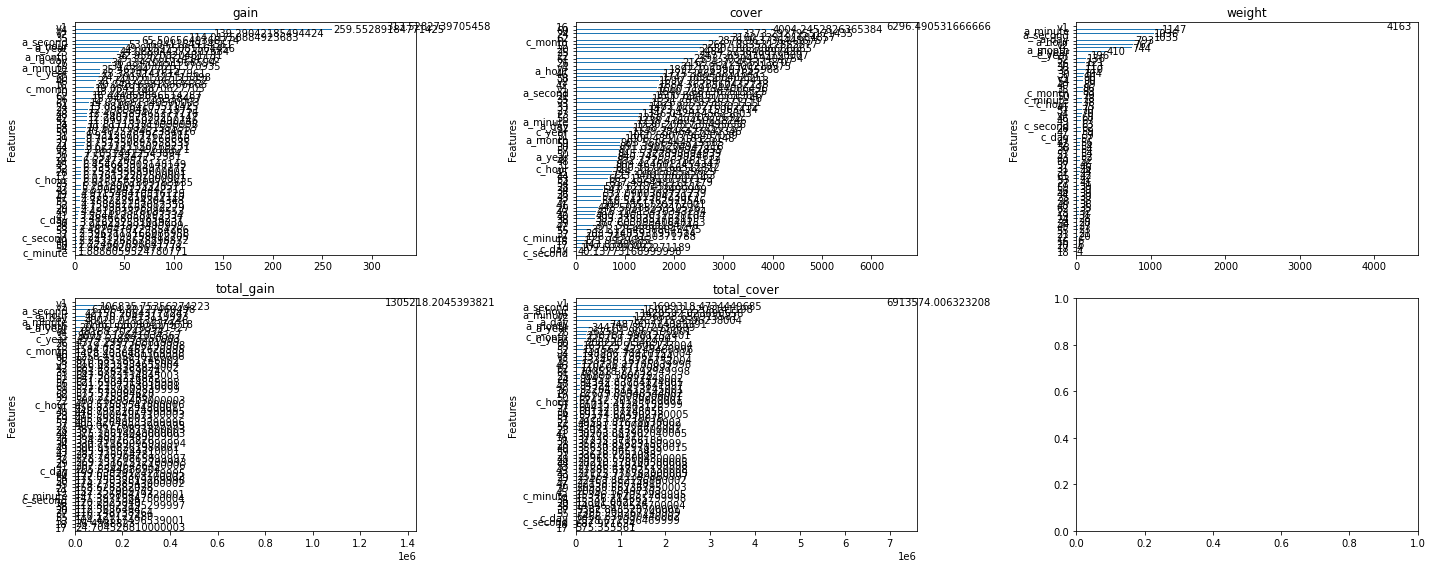

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

axes = [ax for row_axes in axes for ax in row_axes]

xgb.plot_importance(model_xgb, importance_type='gain', title='gain', xlabel="", grid=False, ax=axes[0])

xgb.plot_importance(model_xgb, importance_type='cover', title='cover', xlabel="", grid=False, ax=axes[1])
xgb.plot_importance(model_xgb, importance_type='weight', title='weight', xlabel="", grid=False, ax=axes[2])
xgb.plot_importance(model_xgb, importance_type='total_gain', title='total_gain', xlabel="", grid=False, ax=axes[3])
xgb.plot_importance(model_xgb, importance_type='total_cover', title='total_cover', xlabel="", grid=False, ax=axes[4])
plt.tight_layout()
plt.show()



In [ ]:
pickle.dump(model_xgb, open("/content/drive/MyDrive/model/category_classification/2model_xgb.sparse.dat", "wb"))

* Light Gradient Boost

In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
pickle.dump(model_xgb, open("/content/drive/MyDrive/model/category_classification/2model_lgb.sparse.dat", "wb"))

* Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


MLPClassifier()

In [ ]:
pickle.dump(model_xgb, open("/content/drive/MyDrive/model/category_classification/2model_mlp.sparse.dat", "wb"))

* Cat Boost (220307 updated)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier
# from sklearn.metrics import roc_auc_score
model_cb = CatBoostClassifier(verbose=0, n_estimators=100)
model_cb.fit(X_train, y_train)

In [ ]:
pickle.dump(model_cb, open("/content/drive/MyDrive/model/category_classification/2model_cb.sparse.dat", "wb"))

# Model Tuning + time check


In [ ]:
import time

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(X, y, random_state=37)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)
#X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=37)

* XGBoost

In [ ]:
#xgboost #오래걸림
import xgboost as xgb

tic = time.time() #start time

model_xgb = xgb.XGBClassifier(n_estimators = 500)

model_xgb.fit(X_train, y_train)
       #eval_metric = "auc")
# xgb_roc_score = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1],
#     average='macro')

toc = time.time() #end time
print("xgb")
y_pred = model_xgb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )
y_pred = model_xgb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

#print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.8413
print('time elapsed:', toc - tic) #34초

xgb
  accuracy(train) :  0.957
  accuracy(test)  :  0.9366
  f1score-weighted(test)  :  0.939438654424938
  f1score-micro(test)  :  0.9366
time elapsed: 1428.5513725280762


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=37)

In [ ]:
import xgboost as xgb
tic = time.time()

#-------------------
# Grid Search
model_xgb = xgb.XGBClassifier(objective='multi:softprob', n_estimators = 100, random_state = 37)

# 하이퍼파라미터 후보
params = {'max_depth':[5,7]
    , 'min_child_weight':[1,3]
    , 'colsample_bytree':[0.5,0.75]}
# folds = 3
gridcv = GridSearchCV(model_xgb, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "mlogloss", # "auc",
          eval_set = [(X_train, y_train)  ])   # , (X_eval, y_eval)]) 


[0]	validation_0-mlogloss:2.46697
Will train until validation_0-mlogloss hasn't improved in 30 rounds.
[1]	validation_0-mlogloss:2.18582
[2]	validation_0-mlogloss:1.95976
[3]	validation_0-mlogloss:1.79564
[4]	validation_0-mlogloss:1.69158
[5]	validation_0-mlogloss:1.57844
[6]	validation_0-mlogloss:1.4566
[7]	validation_0-mlogloss:1.35598
[8]	validation_0-mlogloss:1.27187
[9]	validation_0-mlogloss:1.20242
[10]	validation_0-mlogloss:1.13114
[11]	validation_0-mlogloss:1.07504
[12]	validation_0-mlogloss:1.02248
[13]	validation_0-mlogloss:0.982686
[14]	validation_0-mlogloss:0.947491
[15]	validation_0-mlogloss:0.910528
[16]	validation_0-mlogloss:0.870879
[17]	validation_0-mlogloss:0.835987
[18]	validation_0-mlogloss:0.8065
[19]	validation_0-mlogloss:0.773156
[20]	validation_0-mlogloss:0.745771
[21]	validation_0-mlogloss:0.719962
[22]	validation_0-mlogloss:0.702445
[23]	validation_0-mlogloss:0.677017
[24]	validation_0-mlogloss:0.655482
[25]	validation_0-mlogloss:0.635667
[26]	validation_0-mlo

ValueError: ignored

In [ ]:
#위에 한시간 반 걸려서 fit됨

In [ ]:
toc = time.time()

In [ ]:
# xgb_roc_score = roc_auc_score(y_eval, gridcv.predict_proba(X_eval)[:,1],
#     average='macro')
#-------------------

#toc = time.time()

print('Optimized hyperparameters', gridcv.best_params_) 
#{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
#print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.8433


print('time elapsed:', toc - tic) # 178초 = 3분

Optimized hyperparameters {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}
time elapsed: 5503.004603862762


In [ ]:
y_pred = gridcv.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )


  accuracy(train) :  0.9743125


In [ ]:
y_pred = gridcv.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

  accuracy(test)  :  0.9477
  f1score-weighted(test)  :  0.9499346602291882
  f1score-micro(test)  :  0.9477000000000001


In [ ]:
# 최적 파라미터 적용하여 test
model_xgb = xgb.XGBClassifier(objective='multi:softprob', n_estimators = 100, random_state = 37,
    max_depth=7, min_child_weight=1, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, max_depth=7, objective='multi:softprob',
              random_state=37)

In [ ]:
y_pred = model_xgb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )
y_pred = model_xgb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

  accuracy(train) :  0.9743125
  accuracy(test)  :  0.9477
  f1score-weighted(test)  :  0.9499346602291882
  f1score-micro(test)  :  0.9477000000000001


In [ ]:
# 최적 파라미터 적용하여 test
model_xgb = xgb.XGBClassifier(objective='multi:softprob', n_estimators = 500, random_state = 37,
    max_depth=7, min_child_weight=1, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, max_depth=7, n_estimators=500,
              objective='multi:softprob', random_state=37)

In [ ]:
y_pred = model_xgb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )
y_pred = model_xgb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

  accuracy(train) :  0.99959375
  accuracy(test)  :  0.9612
  f1score-weighted(test)  :  0.9622413215019012
  f1score-micro(test)  :  0.9612


# Test

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

* Linear Regression

In [ ]:

print("Linear Regression -")
y_pred = model_lr.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_lr.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )


Linear Regression -
  accuracy(train) :  0.3129875
  accuracy(test)  :  0.3102
  f1score-weighted(test)  :  0.4397949617375022
  f1score-micro(test)  :  0.3102


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred

array([1, 3, 1, ..., 1, 1, 1])

In [ ]:
y_test.values

array([5, 5, 7, ..., 1, 8, 2])

* Random Forest

In [ ]:
print("Random Forest -")
y_pred = model_rf.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_rf.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

Random Forest -


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


  accuracy(train) :  0.9847875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


  accuracy(test)  :  0.98375
  f1score-weighted(test)  :  0.983869156607935
  f1score-micro(test)  :  0.98375


In [ ]:
print("Random Forest800 -")
y_pred = model_rf800.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_rf800.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

Random Forest800 -


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


  accuracy(train) :  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


  accuracy(test)  :  0.92305
  f1score-weighted(test)  :  0.9264381535481804
  f1score-micro(test)  :  0.92305


* XGBoost

In [ ]:
print("XGBoost -")
y_pred = model_xgb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_xgb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

XGBoost -
  accuracy(train) :  0.8917
  accuracy(test)  :  0.8915
  f1score-weighted(test)  :  0.9014539621476879
  f1score-micro(test)  :  0.8915


In [ ]:
print("XGBoost - gbtree case")
y_pred = model_xgb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_xgb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

XGBoost - gbtree case
  accuracy(train) :  0.889525
  accuracy(test)  :  0.8858
  f1score-weighted(test)  :  0.8972859725219156
  f1score-micro(test)  :  0.8858


* Light Gradient Boost

In [ ]:
print("LightGradientBoost -")
y_pred = model_lgb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_lgb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

LightGradientBoost -
  accuracy(train) :  0.5138375
  accuracy(test)  :  0.5001
  f1score-weighted(test)  :  0.4825382447274934
  f1score-micro(test)  :  0.5001


* Multi Layer Perceptron

In [ ]:
print("MLP -")
y_pred = model_mlp.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_mlp.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

MLP -


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


  accuracy(train) :  0.622725
  accuracy(test)  :  0.6168
  f1score-weighted(test)  :  0.6554603354607763
  f1score-micro(test)  :  0.6168


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


* Cat Boost (220307 updated)

In [ ]:
print("Cat Boost -")
y_pred = model_cb.predict(X_train)
print( "  accuracy(train) : ", accuracy_score(y_pred, y_train) )

y_pred = model_cb.predict(X_test)
print( "  accuracy(test)  : ", accuracy_score(y_pred, y_test) )
print( "  f1score-weighted(test)  : ", f1_score(y_pred, y_test, average='weighted') )
print( "  f1score-micro(test)  : ", f1_score(y_pred, y_test, average='micro') )

Cat Boost -
  accuracy(train) :  0.7681875
  accuracy(test)  :  0.7608
  f1score-weighted(test)  :  0.7612262911346144
  f1score-micro(test)  :  0.7607999999999999


In [ ]:
print(pred)

[1]


In [ ]:
pred = model_rf.predict(input_vector)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(pred)

[22]


In [ ]:
print( str(pred[0]) )

22


# Cross Validation Test

In [ ]:
# cross validation test
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import accuracy_score

* Logistic Regression

In [ ]:


#Logistic Regression
scores_lr = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_lr = LogisticRegression(solver='lbfgs')
    model_lr.fit(X_train, y_train)
    #xgb_model = xgb.XGBRegressor(objective="reg:linear")
    #xgb_model.fit(X_train, y_train)
    
    y_pred = model_lr.predict(X_test)
    
    scores_lr.append(accuracy_score(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [ ]:
print("Logistic Regression")
print(scores_lr)
print( statistics.mean(scores_lr))

Logistic Regression
[0.3124, 0.3064, 0.3077, 0.3074, 0.3133, 0.3024, 0.3159, 0.3101, 0.3093, 0.322]
0.31069


* Random Forest

In [ ]:
#Random Forest
scores_rf = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_rf = RandomForestClassifier(10)
    model_rf.fit(X_train, y_train)
    
    y_pred = model_rf.predict(X_test)
    
    scores_rf.append(accuracy_score(y_test, y_pred))

print("Random Forest")
print(scores_rf)
print( statistics.mean(scores_rf))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Random Forest
[0.8984, 0.8971, 0.8924, 0.901, 0.896, 0.8944, 0.8974, 0.8976, 0.8998, 0.8949]
0.8969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest2000
scores_rf2000 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_rf2000 = RandomForestClassifier(200)
    model_rf2000.fit(X_train, y_train)
    
    y_pred = model_rf2000.predict(X_test)
    
    scores_rf2000.append(accuracy_score(y_test, y_pred))

print("Random Forest2000")
print(scores_rf2000)
print( statistics.mean(scores_rf2000))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Random Forest2000
[0.9283, 0.9263, 0.9248, 0.9308, 0.9298, 0.9271, 0.9311, 0.9259, 0.9286, 0.9261]
0.92788


In [ ]:
#Random Forest2000
scores_rf2000 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_rf2000 = RandomForestClassifier(400)
    model_rf2000.fit(X_train, y_train)
    
    y_pred = model_rf2000.predict(X_test)
    
    scores_rf2000.append(accuracy_score(y_test, y_pred))

print("Random Forest2000")
print(scores_rf2000)
print( statistics.mean(scores_rf2000))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Random Forest2000
[0.9285, 0.9273, 0.9249, 0.9317, 0.9282, 0.9272, 0.9308, 0.9251, 0.9283, 0.928]
0.928


In [ ]:
#Random Forest2000
scores_rf2000 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_rf2000 = RandomForestClassifier(800)
    model_rf2000.fit(X_train, y_train)
    
    y_pred = model_rf2000.predict(X_test)
    
    scores_rf2000.append(accuracy_score(y_test, y_pred))

print("Random Forest2000")
print(scores_rf2000)
print( statistics.mean(scores_rf2000))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Random Forest2000
[0.929, 0.9276, 0.9281, 0.9326, 0.9302, 0.9262, 0.9316, 0.9275, 0.9294, 0.9284]
0.92906


In [ ]:
#Random Forest2000
scores_rf2000 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_rf2000 = RandomForestClassifier(1000)
    model_rf2000.fit(X_train, y_train)
    
    y_pred = model_rf2000.predict(X_test)
    
    scores_rf2000.append(accuracy_score(y_test, y_pred))

print("Random Forest2000")
print(scores_rf2000)
print( statistics.mean(scores_rf2000))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Random Forest2000
[0.9283, 0.9294, 0.9279, 0.9326, 0.9296, 0.9274, 0.9318, 0.9264, 0.9298, 0.9272]
0.92904


In [ ]:
print("Random Forest2000")
print(scores_rf2000)
print( statistics.mean(scores_rf2000))

* Light Gradient Boost

In [ ]:
import lightgbm as lgb
#model_lgb = lgb.LGBMClassifier()
#model_lgb.fit()

In [ ]:
#LGB
scores_lgb = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_lgb = lgb.LGBMClassifier()
    model_lgb.fit(X_train, y_train)
    
    y_pred = model_lgb.predict(X_test)
    
    scores_lgb.append(accuracy_score(y_test, y_pred))

print("LGB")
print(scores_lgb)
print( statistics.mean(scores_lgb))

LGB
[0.626, 0.4808, 0.5054, 0.6487, 0.5712, 0.4777, 0.3789, 0.5852, 0.6014, 0.2807]
0.5156000000000001


* XGBoost

In [ ]:
#XGB
scores_xgb = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_xgb = xgb.XGBClassifier() 
    model_xgb.fit(X_train, y_train)
    
    y_pred = model_xgb.predict(X_test)
    
    scores_xgb.append(accuracy_score(y_test, y_pred))

print("XGB")
print(scores_xgb)
print( statistics.mean(scores_xgb))

XGB
[0.8849, 0.8898, 0.883, 0.8901, 0.8893, 0.8855, 0.8878, 0.8894, 0.8848, 0.8862]
0.88708


In [ ]:
#XGB
scores_xgb = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_xgb = xgb.XGBClassifier(booster='gbtree', importance_type='gain', n_estimators = 500) 
    model_xgb.fit(X_train, y_train)
    
    y_pred = model_xgb.predict(X_test)
    
    scores_xgb.append(accuracy_score(y_test, y_pred))

print("XGB")
print(scores_xgb)
print( statistics.mean(scores_xgb))

KeyboardInterrupt: ignored

* Cat boost

In [ ]:
#CB
scores_cb = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_cb = CatBoostClassifier(verbose=0, n_estimators=100)
    model_cb.fit(X_train, y_train)
    
    y_pred = model_cb.predict(X_test)
    
    scores_cb.append(accuracy_score(y_test, y_pred))

print("CB")
print(scores_cb)
print( statistics.mean(scores_cb))

CB
[0.7887, 0.6443, 0.7862, 0.8233, 0.7233, 0.6959, 0.6664, 0.7771, 0.5408, 0.5084]
0.69544


In [ ]:
# from catboost import CatBoostClassifier
# # from sklearn.metrics import roc_auc_score
# model_cb = CatBoostClassifier(verbose=0, n_estimators=100)
# model_cb.fit(X_train, y_train)

* Multi Layer Perceptron

In [ ]:
print(" Multi Layer Perceptron ")

 Multi Layer Perceptron 


In [ ]:
from sklearn.neural_network import MLPClassifier
#nn-mlp
scores_mlp16 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_mlp16 = MLPClassifier(hidden_layer_sizes=(16, ), max_iter=1000)
    model_mlp16.fit(X_train, y_train)
    
    y_pred = model_mlp16.predict(X_test)
    
    scores_mlp16.append(accuracy_score(y_test, y_pred))

print("MLP")
print(scores_mlp16)
print( statistics.mean(scores_mlp16))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

MLP
[0.2933, 0.2878, 0.2871, 0.2868, 0.2921, 0.2834, 0.2931, 0.2922, 0.2905, 0.3016]
0.29079


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.neural_network import MLPClassifier
#nn-mlp
scores_mlp4 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_mlp4 = MLPClassifier(hidden_layer_sizes=(4, ), max_iter=1000)
    model_mlp4.fit(X_train, y_train)
    
    y_pred = model_mlp4.predict(X_test)
    
    scores_mlp4.append(accuracy_score(y_test, y_pred))

print("MLP")
print(scores_mlp4)
print( statistics.mean(scores_mlp4))

NameError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier

#nn-mlp
scores_mlp2 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_mlp2 = MLPClassifier(hidden_layer_sizes=(2, ), max_iter=1000)
    model_mlp2.fit(X_train, y_train)
    
    y_pred = model_mlp2.predict(X_test)
    
    scores_mlp2.append(accuracy_score(y_test, y_pred))

print("mlp")
print(scores_mlp2)
print( statistics.mean(scores_mlp2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

mlp
[0.2931, 0.2879, 0.2874, 0.2868, 0.292, 0.2835, 0.293, 0.2924, 0.2904, 0.3017]
0.29081999999999997


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.neural_network import MLPClassifier

#nn-mlp
scores_mlp2 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_mlp2 = MLPClassifier()
    model_mlp2.fit(X_train, y_train)
    
    y_pred = model_mlp2.predict(X_test)
    
    scores_mlp2.append(accuracy_score(y_test, y_pred))

print("mlp")
print(scores_mlp2)
print( statistics.mean(scores_mlp2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/uti

mlp
[0.6321, 0.6271, 0.6335, 0.619, 0.6187, 0.6393, 0.6396, 0.6278, 0.6276, 0.6054]
0.62701


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# ---not used below --

# New Model

In [ ]:
from randomforest import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X, y)

TypeError: ignored

In [ ]:
#nn-mlp
scores_mlp2 = []

kfold = KFold(n_splits=10, shuffle=True, random_state=37)

for train_index, test_index in kfold.split(X):   
    #print("?? ", train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  #y_train, y_test = y[train_index], y[test_index]

    model_mlp2 = MLPClassifier(hidden_layer_sizes=(2, ), max_iter=1000)
    model_mlp2.fit(X_train, y_train)
    
    y_pred = model_mlp2.predict(X_test)
    
    scores_mlp2.append(accuracy_score(y_test, y_pred))

print("mlp")
print(scores_mlp2)
print( statistics.mean(scores_mlp2))

# New Test - roc, f1score, 

In [ ]:
from sklearn.metrics import f1_score
# f1_score(y_true, y_pred, average=[‘micro’, ‘macro’, ‘samples’,’weighted’ 중 하나 선택])

from sklearn.metrics import confusion_matrix
# confusion_matrix(y_true, y_pred)